# Clase 04a: Datos Vectoriales y Geopandas

------

## Objetivos de esta Clase:

En esta clase vamos a aprender a usar la librería Geopandas, que nos permite manipular con mayor facilidad datos vectoriales. También utilizaremos la librería Rasterio para el tratamiento de información raster, como alternativa a GDAL. Los objetivos que se esperan cubrir luego de finalizar esta clase son:

1) Aprender a procesar datos geoespaciales vectoriales: su lectura, interpretación y escritura.  
2) Realizar operaciones básicas de superposición espacial, tanto entre datos vectoriales como entre datos vectoriales y raster.  

### Datos con los que trabajaremos en esta Notebook:

- Capa vectorial de radios censales correspondiente al Censo Nacional de Población y Vivienda 2010.  
- Tablas con datos censales correspondiente al mismo Censo.

## 1. Vectores y geopandas

A diferencia del modelo raster, en el modelo vectorial los datos no se organizan como una matriz, sino que adoptan la representación de elementos geométricos básicos como los puntos, las líneas o los polígonos. El elemento vectorial base es el punto; varios puntos unidos por segmentos definen una línea; y varias líneas y puntos se usan para definir polígonos. 

Esta estructura impacta directamente en la forma en que estos elementos se pueden leer con Python. Hay muchas operaciones que vimos con las imágenes que no podemos aplicar sobre los vectores (como hacer _slicing_ de un aarreglo o el álgebra entre bandas). Sin embargo, la estructura y disposición de los datos vectoriales permiten hacer otros análisis que no son tan directos sobre los archivos raster. Un poco de todo esto repasaremos en las siguientes secciones.

Existen muchas librerías de Python que nos permiten trabajar con datos vectoriales: Nosotros trabajaremos con una llamada **Geopandas**.

Geopandas es una extension de la librería Pandas que nos permite trabajar con datos geoespaciales. Para ello toma elementos de otras librerías especialiazadas como **[shapely](https://shapely.readthedocs.io/en/stable/project.html)** para realizar operaciones geométricas, y **[fiona](https://fiona.readthedocs.io/en/latest/manual.html)** para acceder y/o modificar los archivos. Es decir, se trata de un paquete de funcionalidades de alto nivel.

### 1.1. Estructura de datos en Geopandas

Geopandas maneja dos tipos de estructuras de datos: _Geoseries_ y _Geodataframes_.  Estos son subclases de las Series y los Dataframes que maneja Pandas.

Una _Geoseries_ es la estructura elemental en geopandas. Se trata de un vector donde cada una de esas entradas comprende una o más formas o elementos geométricos. Cada uno de estos registros puede constar de una sola geometría (por ejemplo los polígonos de una capa de barrios de una ciudad) o muchas geometrías (por ejemplo, para representar un archipiélago se usan varios polígonos donde cada uno representa una isla):

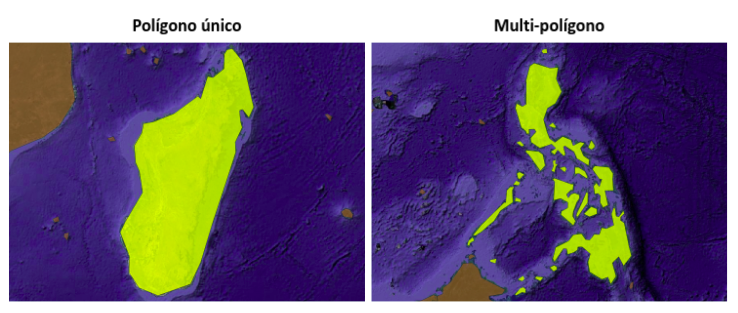

Las _Geoseries_ se pueden manipular como objetos de [Shapely](https://pypi.org/project/Shapely/), lo cual otorga un gran abanico de opciones. Todo el procesamiento geométrico que nos permite GeoPandas descansa sobre las capacidades que le otorga Shapely. 

Los _Geodataframes_ tienen una estructura tabular y contienene una o más _Geoseries_, que representan cada una de las columnas de dicha tabla. Lo importante aquí es entender que dentro de un _Geodataframe_ siempre habrá una columna especial especial sobre la que se pueden hacer las operaciones geométricas. Esta columna normalmente es indicada como la geometría o _geometry_ , aunque su nombre identificatorio no sea exactamente ese:

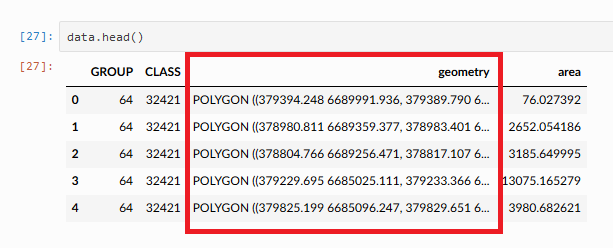

A continuación veremos algunos ejemplos de los principales métodos que podemos usar con un _Geodataframe_. Leeremos con Geopandas el archivo **data/raw_data/vector/radios_recorte_utm.shp** que contiene los radios censales. El método de Geopandas para abrir archivos vectoriales es **[read_file](https://geopandas.org/docs/reference/api/geopandas.read_file.html)**:

```python
import sys
sys.path.append('../')


import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

radios = gpd.read_file('../data/raw_data/vector/radios_recorte_utm.shp')

radios.head(5)
```

In [1]:
#import sys
#sys.path.append('../')

import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

radios = gpd.read_file('./raw_data/vector/radios_recorte_utm.shp')

radios.head(5)

,id,link,totalpobl,area_radio,geometry
0,3413,140143114,337.0,44710.301,"POLYGON ((390434.371 6528057.483, 390645.068 6..."
1,3414,140143113,449.0,61036.640,"POLYGON ((390645.068 6528057.484, 390850.315 6..."
2,3147,140145207,664.0,64648.964,"POLYGON ((389930.914 6524463.019, 390078.96 65..."
3,2282,140148013,1.0,264.768,"POLYGON ((388865.786 6522120.521, 388865.786 6..."
4,2301,140147816,206.0,37421.025,"POLYGON ((389604.578 6522120.521, 389334.291 6..."


Si imprimimos el tipo de dato de _radios_, Python nos dirá que se trata de un GeoDataFrame:

```python
print(type(radios))
```

In [2]:
print(type(radios))

<class 'geopandas.geodataframe.GeoDataFrame'>


### 1.2. Atributos y operaciones básicas

Como dijimos mas arriba, sobre la geometría se pueden consultar ciertos atributos. Algunos de los mas comunes son:

- area : Devuelve el área de cada uno de los elementos geométricos
- crs : Devuelve la descripción del Sistema de Coordenadas en que se encuentra el vector
- bounds: Devuelve la extensión (Norte/Sur/Este/Oeste) de cada uno de los elementos geométricos
- total_bounds: Devuelve la extensión total de la capa (algo así como el _extent_ que nos da QGIS)
- geom_type: Nos devuelve el tipo de geometría

Algunos ejemplos:

```python
print('Extensión total:',radios.total_bounds)

print('Área de cada elemento: \n',round(radios.area,2))

print('Sistema de coordenadas:',radios.crs)
```

In [3]:
print('Extensión total:',radios.total_bounds)

print('Área de cada elemento: \n',round(radios.area,2))

print('Sistema de coordenadas:',radios.crs)

print(f'Sistema de coordenadas: {radios.bounds}')

print(f'Sistema de coordenadas: {radios.geom_type}')

Extensión total: [ 388865.786  6522120.521   399675.3153 6528057.4835]
Área de cada elemento: 
 0       44710.30
1       61036.64
2       64648.96
3         264.77
4       37421.02
         ...    
262      5056.06
263    917454.62
264     63240.05
265     60538.98
266    169592.73
Length: 267, dtype: float64
Sistema de coordenadas: EPSG:32720
Sistema de coordenadas:               minx          miny           maxx          maxy
0    390384.679827  6.527824e+06  390645.068309  6.528057e+06
1    390609.962728  6.527742e+06  390858.692814  6.528057e+06
2    389930.913553  6.524236e+06  390261.619318  6.524550e+06
3    388865.786000  6.522121e+06  388917.958097  6.522130e+06
4    389334.291432  6.522121e+06  389617.392346  6.522353e+06
..             ...           ...            ...           ...
262  392253.807237  6.528011e+06  392473.028994  6.528057e+06
263  398648.030981  6.524832e+06  399459.688694  6.527438e+06
264  389742.620498  6.523942e+06  390083.964432  6.524231e+06
265  39035

Además de los atributos, también existen métodos como  `_.plot()_` que nos permiten visualizar la capa. Plot hereda casi todas las propiedades de `pyplot` (Matplotlib), con lo cual los parámetros para configurarlo son muy similares.

```python
radios.plot(figsize = (20,10))
plt.show()
```

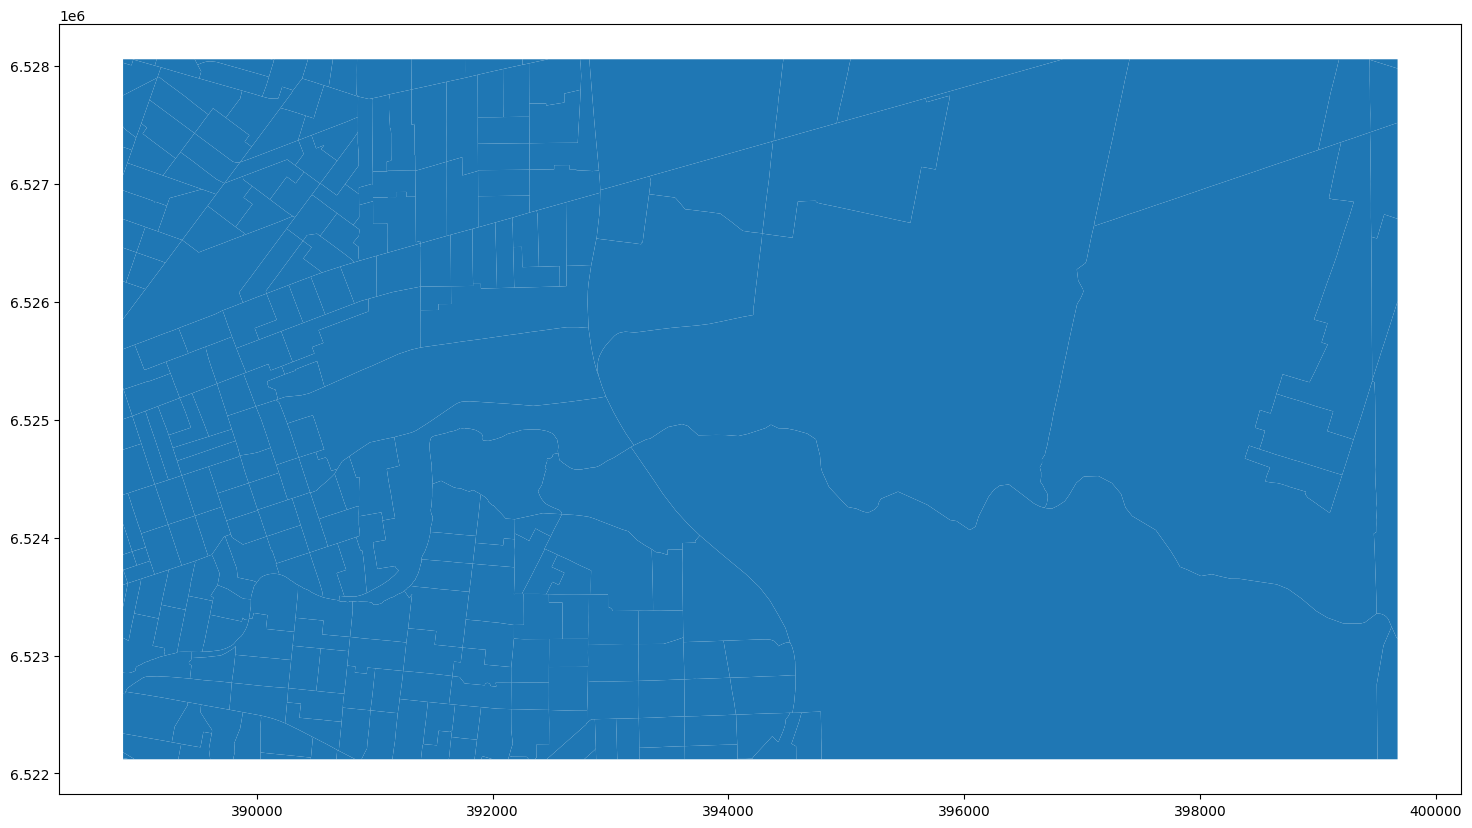

In [4]:
radios.plot(figsize = (20,10))
plt.show()

**¿Tiene algo que ver con las imágenes con las que trabajamos en la Clase anterior?** Retomaremos la visualización más adelante, por ahora concentrémosnos en desmenzuar un poco más esta capa vectorial.

Los radios censales son unidades que se definen para relevar el territorio cada vez que se realiza un Censo de Población y Vivienda. En Argentina los responsables de generar la cartografía censal son el INDEC y las Direcciones Provinciales de Estadística. En este [link](https://sitioanterior.indec.gob.ar/codgeo.asp) se pueden descargar las capas vectoriales con radios censales para todo el país. Los radios se agrupan en fracciones censales, que a su vez forman parte de un departamento y una provincia específico.


Cuando hicimos la consulta con _.columns_ , encontramos los siguientes atributos dentro de radios:

- ID: Es un identificador único de cada elemento que se genera al importarlo como Geodataframe
- Link: Es la clave censal que permite identificar al radio. En el mismo se especifica la provincia, el departamento, la fracción y el radio censal.
- Totalpobl: El total de personas de ese radio censal
- Area_radio: La superficie del radio censal en m2
- Geometry: La columna de geometría

Supongamos que queremos cambiarles los nombres a estas columnas y ponerles otros con los que estemos más cómodos. La forma más simple de especificarlos es utilizando la estructura de los diccionarios de datos aprendida en la Clase 01:

```python
#Definimos un diccionario para mapear los nombres actuales a nombres nuevos:
nombres_col  = {'link': 'codigo', 'totalpobl': 'personas', 'area_radio': 'sup_m2'}

#Renombramos usando el diccionario anterior:
radios.rename(columns = nombres_col, inplace = True)

radios.head()
```

In [5]:
radios.columns

Index(['id', 'link', 'totalpobl', 'area_radio', 'geometry'], dtype='object')

In [6]:
#Definimos un diccionario para mapear los nombres actuales a nombres nuevos:
nombres_col  = {'link': 'codigo', 'totalpobl': 'personas', 'area_radio': 'sup_m2'}

#Renombramos usando el diccionario anterior:
radios.rename(columns = nombres_col, inplace = True)

radios.head()

,id,codigo,personas,sup_m2,geometry
0,3413,140143114,337.0,44710.301,"POLYGON ((390434.371 6528057.483, 390645.068 6..."
1,3414,140143113,449.0,61036.640,"POLYGON ((390645.068 6528057.484, 390850.315 6..."
2,3147,140145207,664.0,64648.964,"POLYGON ((389930.914 6524463.019, 390078.96 65..."
3,2282,140148013,1.0,264.768,"POLYGON ((388865.786 6522120.521, 388865.786 6..."
4,2301,140147816,206.0,37421.025,"POLYGON ((389604.578 6522120.521, 389334.291 6..."


Las columnas se renombraron correctamente. Supongamos ahora que queremos crear una columna que tenga el área en km2 en lugar de m2. Para ello podemos dividir la columna **sup_m2** por 1e6 (1 millón), o dividir por 1e6 la salida del atributo .area: 

```python
#Opción 1: 

print(radios['sup_m2'] / 1e6)

#Opción 2:
print(radios.area / 1e6)
```

In [7]:
#Opción 1: 

print(radios['sup_m2'] / 1e6)

#Opción 2:
print(radios.area / 1e6)

0      0.044710
1      0.061037
2      0.064649
3      0.000265
4      0.037421
         ...   
262    0.005056
263    0.917455
264    0.063240
265    0.060539
266    0.169593
Name: sup_m2, Length: 267, dtype: float64
0      0.044710
1      0.061037
2      0.064649
3      0.000265
4      0.037421
         ...   
262    0.005056
263    0.917455
264    0.063240
265    0.060539
266    0.169593
Length: 267, dtype: float64


La forma de crear una nueva columna, es exactamente igual a la de un Datframe de pandas:

```python
radios['sup_km2'] = radios.area / 1e6
radios.head()
```

In [8]:
radios['sup_km2'] = radios.area / 1e6
radios.head()

,id,codigo,personas,sup_m2,geometry,sup_km2
0,3413,140143114,337.0,44710.301,"POLYGON ((390434.371 6528057.483, 390645.068 6...",0.044710
1,3414,140143113,449.0,61036.640,"POLYGON ((390645.068 6528057.484, 390850.315 6...",0.061037
2,3147,140145207,664.0,64648.964,"POLYGON ((389930.914 6524463.019, 390078.96 65...",0.064649
3,2282,140148013,1.0,264.768,"POLYGON ((388865.786 6522120.521, 388865.786 6...",0.000265
4,2301,140147816,206.0,37421.025,"POLYGON ((389604.578 6522120.521, 389334.291 6...",0.037421


Si queremos cambiar el orden de las columnas, podemos generar una lista replicando sus nombres en la secuencia deseada, y redefinir el dataframe con ese orden:

```python
#Imprimo la lista actual de columnas (esto es solo como ayuda):

print(list(radios.columns))

# Defino una lista con el orden nuevo:

cols = ['id', 'codigo', 'personas', 'sup_m2','sup_km2', 'geometry']

# Redefino el geodataframe con el nuevo orden:
radios = radios[cols]
print(radios)
```

In [9]:
#Imprimo la lista actual de columnas (esto es solo como ayuda):

print(list(radios.columns))

# Defino una lista con el orden nuevo:

cols = ['id', 'codigo', 'personas', 'sup_m2','sup_km2', 'geometry']

# Redefino el geodataframe con el nuevo orden:
radios = radios[cols]
print(radios)

['id', 'codigo', 'personas', 'sup_m2', 'geometry', 'sup_km2']
       id     codigo  personas      sup_m2   sup_km2  \
0    3413  140143114     337.0   44710.301  0.044710   
1    3414  140143113     449.0   61036.640  0.061037   
2    3147  140145207     664.0   64648.964  0.064649   
3    2282  140148013       1.0     264.768  0.000265   
4    2301  140147816     206.0   37421.025  0.037421   
..    ...        ...       ...         ...       ...   
262  3615  140140515      64.0    5056.056  0.005056   
263  3632  140140708    1326.0  917454.615  0.917455   
264  3780  140145307     596.0   63240.050  0.063240   
265  3781  140145205     456.0   60538.975  0.060539   
266  4484  141470206       0.0  169592.727  0.169593   

                                              geometry  
0    POLYGON ((390434.371 6528057.483, 390645.068 6...  
1    POLYGON ((390645.068 6528057.484, 390850.315 6...  
2    POLYGON ((389930.914 6524463.019, 390078.96 65...  
3    POLYGON ((388865.786 6522120.521

 **Nota:** En la celda anterior, hemos regenerado el `geodataframe` con el orden especificado. A no ser que estemos muy seguros del cambio, nos conviene siempre trabajar con copias del elemento original.

Guardamos nuestro Geodataframe modificado como archivo de extensión .SHP, en la misma carpeta **data/proc**:

```python
radios.to_file('../data/proc/radios_clase04a.shp')
```

In [10]:
radios.to_file('./proc/radios_clase04a.shp')

Si lo abrimos en QGIS, podemos corroborar que los atributos reflejan las modificaciones realizadas:

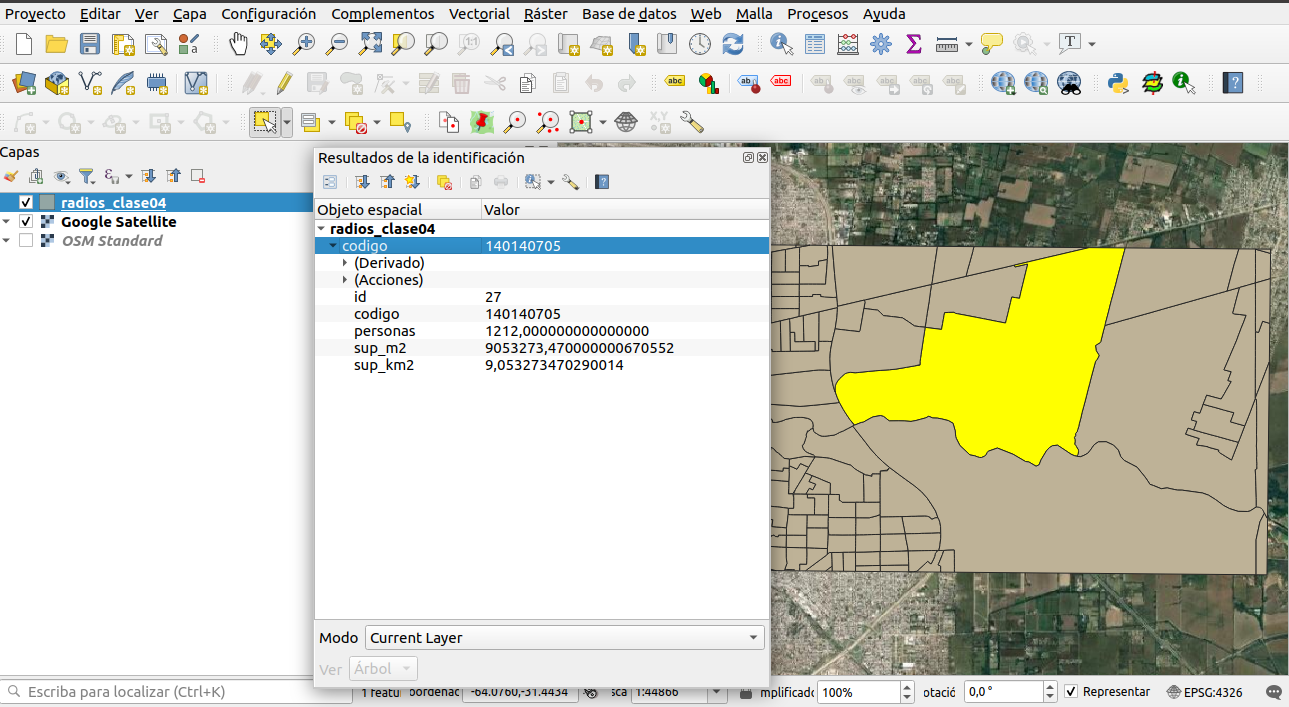

Y en nuestra carpeta se deberán haber generado los ficheros que acompañas normalmente al shape:

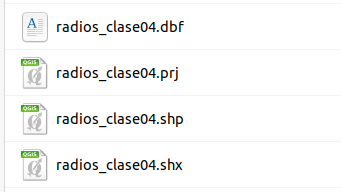

#### Una alternativa: El formato GeoPackage

Si bien hasta ahora hemos desarrollado todos nuestros ejmplos con el formato shapefile, que es el más tradicional y difundido dentro de los datos vectoriales, vale este espacio para mencionar a **GeoPackage**.

Geopackage es un formato de archivo que sirve tanto para el formato raster como el vectorial, que almacena la información bajo la estructura de una base datos SQLite. Frente al shapefile, una gran ventaja es que se almacena como un único archivo **.gpkg**, lo cual simplifica mucho las cosas. En los últimos años muchos software de SIG lo vienen incorporando. De hecho, QGIS lo ofrece como el formato de salida por defecto desde su versión 3.X. 

Se puede consultar más información sobre este fomato en el siguiente [enlace](https://mappinggis.com/2017/06/geopackage-para-novatos-uso-en-arcgis-qgis-publicacion-en-geoserver/#Ventajas_de_utilizar_GeoPackage). 

En el ejemplo anterior, en lugar de guardar la capa procesada como shapefile, lo podemos hacer como GeoPackage, y tanto Geopandas como QGIS lo van a reconocer sin problemas:

```python
radios.to_file('../data/proc/radios_clase04.gpkg')
```

In [11]:
radios.to_file('./proc/radios_clase04.gpkg')

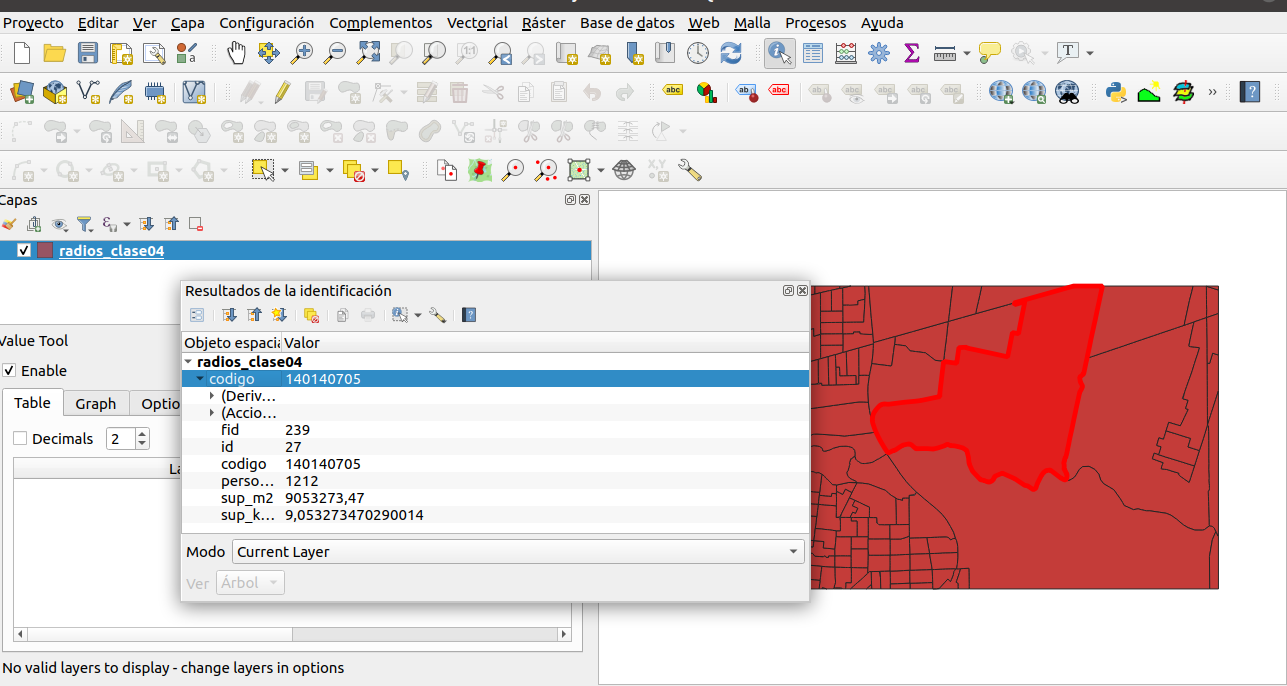

### Ejercicio 1.1 (Opcional):

a) Sobre el Geodataframe de radios, calcular una columna que refleje la densidad de personas por km2.

b) Reordenar las columnas para que _geometry_ quede siempre al final (puede re-definir el mismo dataframe).

c) Guardar el Geodataframe modificado como archivo Shapefile y/o como archivo Geopackage y verificar los cambios en QGIS.  

In [12]:
radios['densidad'] = radios['personas'] / radios['sup_km2']

print(radios.head())

     id     codigo  personas     sup_m2   sup_km2  \
0  3413  140143114     337.0  44710.301  0.044710   
1  3414  140143113     449.0  61036.640  0.061037   
2  3147  140145207     664.0  64648.964  0.064649   
3  2282  140148013       1.0    264.768  0.000265   
4  2301  140147816     206.0  37421.025  0.037421   

                                            geometry      densidad  
0  POLYGON ((390434.371 6528057.483, 390645.068 6...   7537.412974  
1  POLYGON ((390645.068 6528057.484, 390850.315 6...   7356.237171  
2  POLYGON ((389930.914 6524463.019, 390078.96 65...  10270.852930  
3  POLYGON ((388865.786 6522120.521, 388865.786 6...   3776.898228  
4  POLYGON ((389604.578 6522120.521, 389334.291 6...   5504.926763  


C:\Users\pablonicolasr\anaconda3\envs\pdis_phd\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
cols = [col for col in radios.columns if col != 'geometry'] + ['geometry']
radios = radios[cols]

print(radios)

       id     codigo  personas      sup_m2   sup_km2      densidad  \
0    3413  140143114     337.0   44710.301  0.044710   7537.412974   
1    3414  140143113     449.0   61036.640  0.061037   7356.237171   
2    3147  140145207     664.0   64648.964  0.064649  10270.852930   
3    2282  140148013       1.0     264.768  0.000265   3776.898228   
4    2301  140147816     206.0   37421.025  0.037421   5504.926763   
..    ...        ...       ...         ...       ...           ...   
262  3615  140140515      64.0    5056.056  0.005056  12658.088056   
263  3632  140140708    1326.0  917454.615  0.917455   1445.303101   
264  3780  140145307     596.0   63240.050  0.063240   9424.407412   
265  3781  140145205     456.0   60538.975  0.060539   7532.337593   
266  4484  141470206       0.0  169592.727  0.169593      0.000000   

                                              geometry  
0    POLYGON ((390434.371 6528057.483, 390645.068 6...  
1    POLYGON ((390645.068 6528057.484, 390850

In [14]:
radios.to_file("./proc/out/radios_densidad.shp", driver='ESRI Shapefile')

radios.to_file("./proc//out/radios_densidad.gpkg", layer='radios', driver='GPKG')

### 1.3.  Vinculación con tablas externas

Nuestra tabla de radios censales no tiene mucha más información que la cantidad de personas y su superficie. Es un poco escaso ¿no?

Para subsanar esta falta de información, vamos a importar tablas con datos censales para la provincia de Córdoba, y la vincularemos con nuestra tabla de radios importada como Geodataframe.

Encontraremos las tablas como los archivos **viviendas.csv y personas.csv**. Los mismos fueron elaborados a partir de tablas que se pueden descargar del [sitio](https://datosestadistica.cba.gov.ar/dataset/censo-2010-resultados-definitivos) de la Dirección de Estadísticas y Censos de la Provincia de Córdoba.

Trabajaremos como ejemplo con los datos de **viviendas.csv**, y dejaremos las otras dos tablas para los ejercicios.

```python
import pandas as pd

viviendas = pd.read_csv('../data/raw_data/viviendas.csv')
viviendas.head()
```

In [15]:
import pandas as pd

viviendas = pd.read_csv('./raw_data/viviendas.csv')
viviendas.head()

,codigo,prov,dpto,frac,rad,1,2,3,total
0,140070101,14,7,1,1,8,6,3,17
1,140070102,14,7,1,2,31,33,57,121
2,140070103,14,7,1,3,43,24,12,79
3,140070104,14,7,1,4,8,12,3,23
4,140070105,14,7,1,5,33,19,18,70


Este dataset de viviendas contiene información sobre la calidad constructiva de las mismas, por radio censal. La columna **1** indica calidad Satisfactoria, la **2** calidad Básica y la **3** indica una calidad de construcción deficiente. Si consultamos el largo de este dataset, veremos que es mucho más grande que nuestra tabla de radios, ya que cubre toda la provincia de Córdoba:

```python
print(len(viviendas))
print(len(radios))
```

In [16]:
print(len(viviendas))
print(len(radios))

4752
267


Necesitamos vincular nuestros Geodataframe de radios con la tabla de viviendas, y eso lo podemos hacer con el comando _merge()_ de Pandas. El Merge realiza una unión entre tablas basándose en un atributo en común, que en este caso es el código de identificación censal.

Además de especificar las columnas a usar para vincular las tablas, debemos también especificar cómo queremos hacer el Merge: **inner, left, right o full**. La siguiente figura ayuda a entender un poco mejor qué significa cada una:

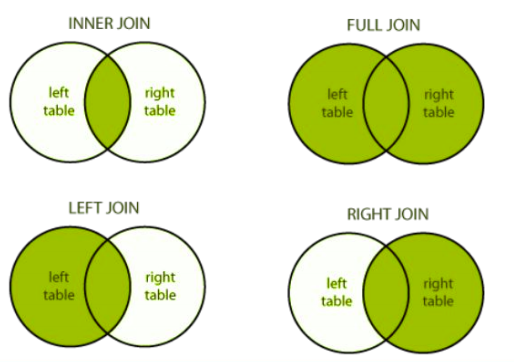

Un _inner join_ solo nos dejaría los elementos para los cuales hay coincidencia entre ambos conjuntos. Left JOIN conserva todos los elementos de la tabla izquierda, y solo aquellos de la segunda tabla que coinciden. ¿Y qué pasa si usamos right JOIN?

Obviamente, el uso de estos parámetros variará según en qué orden pongamos nuestras tablas (¿quién va a la derecha y a la izquierda respectivamente?). Veámoslo con el código:

```python
radios_merge = radios.merge(viviendas, how = 'left', left_on = 'codigo', right_on = 'codigo')
```

In [17]:
radios_merge = radios.merge(viviendas, how = 'left', left_on = 'codigo', right_on = 'codigo')

ValueError: You are trying to merge on object and int64 columns for key 'codigo'. If you wish to proceed you should use pd.concat

Lo que pasó en la celda anterior es que el tipo de datos de la columna **codigo** en una tabla y en la otra no es igual. En viviendas, está codificada como número entero, cuando en realidad debería ser un texto o cadena:

```python
print(viviendas.codigo)
print(radios.codigo)
```

In [18]:
print(viviendas.codigo)
print(radios.codigo)

0       140070101
1       140070102
2       140070103
3       140070104
4       140070105
          ...    
4747    141821308
4748    141821309
4749    141821310
4750    141821311
4751    141821312
Name: codigo, Length: 4752, dtype: int64
0      140143114
1      140143113
2      140145207
3      140148013
4      140147816
         ...    
262    140140515
263    140140708
264    140145307
265    140145205
266    141470206
Name: codigo, Length: 267, dtype: object


Lo que podemos hacer es re-definir el Dataframe de viviendas especificando que **codigo** sea un string:

```python
viviendas = viviendas.astype({'codigo' : str})
viviendas.head()
```

In [19]:
viviendas = viviendas.astype({'codigo' : str})
viviendas.head()

,codigo,prov,dpto,frac,rad,1,2,3,total
0,140070101,14,7,1,1,8,6,3,17
1,140070102,14,7,1,2,31,33,57,121
2,140070103,14,7,1,3,43,24,12,79
3,140070104,14,7,1,4,8,12,3,23
4,140070105,14,7,1,5,33,19,18,70


Y ahora sí, podemos probar el merge:

```python
radios_merge = radios.merge(viviendas, how = 'left', left_on = 'codigo', right_on = 'codigo')
radios_merge.head()
```

In [20]:
radios_merge = radios.merge(viviendas, how = 'left', left_on = 'codigo', right_on = 'codigo')
radios_merge.head()

,id,codigo,personas,sup_m2,sup_km2,densidad,geometry,prov,dpto,frac,rad,1,2,3,total
0,3413,140143114,337.0,44710.301,0.044710,7537.412974,"POLYGON ((390434.371 6528057.483, 390645.068 6...",14,14,31,14,97,157,9,263
1,3414,140143113,449.0,61036.640,0.061037,7356.237171,"POLYGON ((390645.068 6528057.484, 390850.315 6...",14,14,31,13,142,115,9,266
2,3147,140145207,664.0,64648.964,0.064649,10270.852930,"POLYGON ((389930.914 6524463.019, 390078.96 65...",14,14,52,7,165,51,0,216
3,2282,140148013,1.0,264.768,0.000265,3776.898228,"POLYGON ((388865.786 6522120.521, 388865.786 6...",14,14,80,13,59,64,12,135
4,2301,140147816,206.0,37421.025,0.037421,5504.926763,"POLYGON ((389604.578 6522120.521, 389334.291 6...",14,14,78,16,105,27,23,155


En la celda anterior, en **how** especificamos cómo queremos hacer el Merge, **left_on** indica 'el campo de la tabla de radios que usamos para vincular (es nuestra tabla "izquierda" en este caso), y con **right_on** indicamos cómo se llama la columnas en Viviendas (nuestra tabla "derecha"), que en este caso tiene el mismo nombre que en radios.

Corroboramos que ahora tenemos todos los campos agrupados en nuestro nuevo Geodataframe:

```python
print(radios_merge.columns)
```

In [21]:
print(radios_merge.columns)

Index(['id', 'codigo', 'personas', 'sup_m2', 'sup_km2', 'densidad', 'geometry',
       'prov', 'dpto', 'frac', 'rad', '1', '2', '3', 'total'],
      dtype='object')


¡Perfecto! Hemos logrado unir datos provenientes de dos tablas distintas. Ahora que tenemos más información, probaremos hacer algunos ploteos con algo más de color, guiándonos por las referencias que ofrece este [tutorial de geopandas sobre mapeo](https://geopandas.org/docs/user_guide/mapping.html).

Probemos por ejemplo colorear los radios censales según la cantidad de viviendas tipo 3 (calidad constructiva insuficiente) que tiene cada uno:

```python
radios_merge.plot(column = '3' , figsize = (12,6))
plt.show()
```

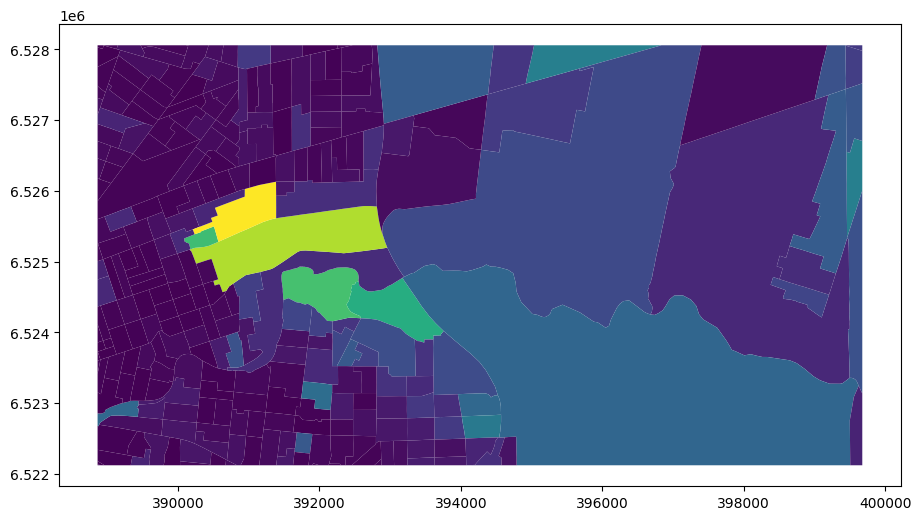

In [22]:
radios_merge.plot(column = '3' , figsize = (12,6))
plt.show()

Quizá mostrando porcentajes en relación al total de viviendas, sea más representativo que cantidades absolutas. Tal como ya aprendimos, podemos calcular una columna con este porcentaje:

```python
#Cambiar nombre de columna a algo más representativo (que no supere 10 caracteres)

radios_merge['porc_viv_3'] = (radios_merge['3'] / radios_merge['total'])*100

radios_merge.plot(column = 'porc_viv_3' , figsize = (12,6))
plt.show()
```

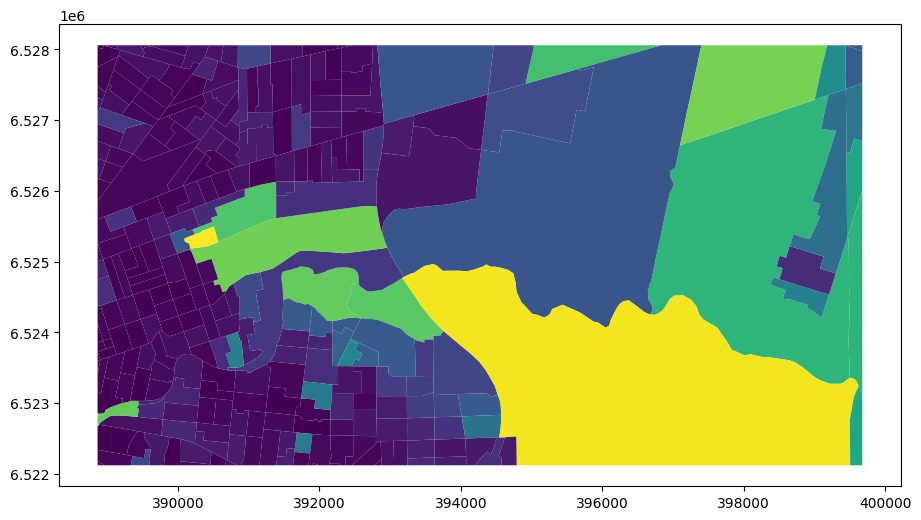

In [23]:
radios_merge['porc_viv_3'] = (radios_merge['3'] / radios_merge['total'])*100

radios_merge.plot(column = 'porc_viv_3' , figsize = (12,6))
plt.show()

Se puede seguir jugando con distintos parámetros que ofrece el método plot, especificando elementos como la leyenda, el título, el mapa de colores, el nivel de transparencia, etc. Se sugiere revisar la documentación de Geopandas para encontrar más opciones.

```python
radios_merge.plot(column = 'porc_viv_3' , figsize = (20,10), legend = True, cmap = 'OrRd', alpha = 0.75)
plt.title('Viviendas con calidad constructiva insuficiente - por Radio Censal')
plt.show()
```

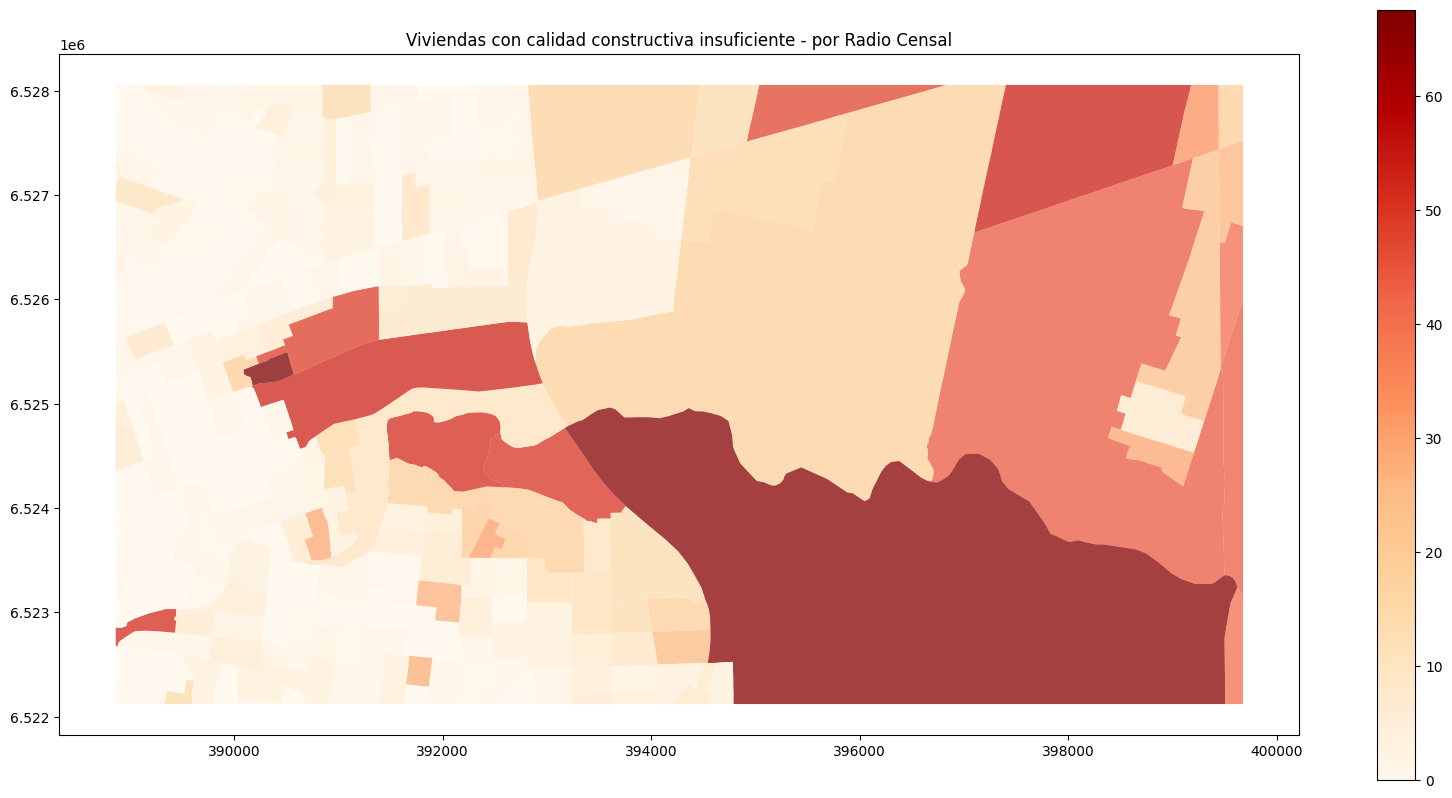

In [24]:
radios_merge.plot(column = 'porc_viv_3' , figsize = (20,10), legend = True, cmap = 'OrRd', alpha = 0.75)
plt.title('Viviendas con calidad constructiva insuficiente - por Radio Censal')
plt.show()

### Ejercicio 1.2:

a) Ordenar las columnas de radios_merge para que _geometry_ quede al final (pueden re-definir el dataset, o crear uno nuevo).

b) Renombrar la columna **total** como **total_v** para identificar que se trata de viviendas. **Nota**: Podés crear una nueva columna que sea una copia de **total**, o probar el método [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) de Pandas.

c) Guardar el Geodataframe con todas las transformaciones realizadas, como **data/out/radios_merge_viv.shp** (o alternativamente, con extensión .gpkg) y corroborar en QGIS que se hayan impactado los cambios.

In [25]:
radios_merge

,id,codigo,personas,sup_m2,sup_km2,densidad,geometry,prov,dpto,frac,rad,1,2,3,total,porc_viv_3
0,3413,140143114,337.0,44710.301,0.044710,7537.412974,"POLYGON ((390434.371 6528057.483, 390645.068 6...",14,14,31,14,97,157,9,263,3.422053
1,3414,140143113,449.0,61036.640,0.061037,7356.237171,"POLYGON ((390645.068 6528057.484, 390850.315 6...",14,14,31,13,142,115,9,266,3.383459
2,3147,140145207,664.0,64648.964,0.064649,10270.852930,"POLYGON ((389930.914 6524463.019, 390078.96 65...",14,14,52,7,165,51,0,216,0.000000
3,2282,140148013,1.0,264.768,0.000265,3776.898228,"POLYGON ((388865.786 6522120.521, 388865.786 6...",14,14,80,13,59,64,12,135,8.888889
4,2301,140147816,206.0,37421.025,0.037421,5504.926763,"POLYGON ((389604.578 6522120.521, 389334.291 6...",14,14,78,16,105,27,23,155,14.838710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,3615,140140515,64.0,5056.056,0.005056,12658.088056,"POLYGON ((392253.807 6528057.484, 392473.029 6...",14,14,5,15,148,224,4,376,1.063830
263,3632,140140708,1326.0,917454.615,0.917455,1445.303101,"POLYGON ((399196.665 6527354.591, 399318.184 6...",14,14,7,8,33,179,68,280,24.285714
264,3780,140145307,596.0,63240.050,0.063240,9424.407412,"POLYGON ((389742.62 6524144.17, 389844.97 6524...",14,14,53,7,169,45,1,215,0.465116
265,3781,140145205,456.0,60538.975,0.060539,7532.337593,"POLYGON ((390355.877 6524679.751, 390428.173 6...",14,14,52,5,116,40,1,157,0.636943


In [27]:
cols = [col for col in radios_merge.columns if col != 'geometry'] + ['geometry']
radios_merge = radios_merge[cols]

radios_merge

,id,codigo,personas,sup_m2,sup_km2,densidad,prov,dpto,frac,rad,1,2,3,total,porc_viv_3,geometry
0,3413,140143114,337.0,44710.301,0.044710,7537.412974,14,14,31,14,97,157,9,263,3.422053,"POLYGON ((390434.371 6528057.483, 390645.068 6..."
1,3414,140143113,449.0,61036.640,0.061037,7356.237171,14,14,31,13,142,115,9,266,3.383459,"POLYGON ((390645.068 6528057.484, 390850.315 6..."
2,3147,140145207,664.0,64648.964,0.064649,10270.852930,14,14,52,7,165,51,0,216,0.000000,"POLYGON ((389930.914 6524463.019, 390078.96 65..."
3,2282,140148013,1.0,264.768,0.000265,3776.898228,14,14,80,13,59,64,12,135,8.888889,"POLYGON ((388865.786 6522120.521, 388865.786 6..."
4,2301,140147816,206.0,37421.025,0.037421,5504.926763,14,14,78,16,105,27,23,155,14.838710,"POLYGON ((389604.578 6522120.521, 389334.291 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,3615,140140515,64.0,5056.056,0.005056,12658.088056,14,14,5,15,148,224,4,376,1.063830,"POLYGON ((392253.807 6528057.484, 392473.029 6..."
263,3632,140140708,1326.0,917454.615,0.917455,1445.303101,14,14,7,8,33,179,68,280,24.285714,"POLYGON ((399196.665 6527354.591, 399318.184 6..."
264,3780,140145307,596.0,63240.050,0.063240,9424.407412,14,14,53,7,169,45,1,215,0.465116,"POLYGON ((389742.62 6524144.17, 389844.97 6524..."
265,3781,140145205,456.0,60538.975,0.060539,7532.337593,14,14,52,5,116,40,1,157,0.636943,"POLYGON ((390355.877 6524679.751, 390428.173 6..."


In [28]:
nombres_col2  = {'total': 'total_v'}

#Renombramos usando el diccionario anterior:
radios_merge.rename(columns = nombres_col2, inplace = True)

radios_merge.columns

Index(['id', 'codigo', 'personas', 'sup_m2', 'sup_km2', 'densidad', 'prov',
       'dpto', 'frac', 'rad', '1', '2', '3', 'total_v', 'porc_viv_3',
       'geometry'],
      dtype='object')

In [50]:
radios_merge.to_file("./proc/out/radios_merge_viv.shp", driver='ESRI Shapefile')

radios_merge.to_file("./proc/out/radios_merge_viv.gpkg", layer='radios', driver='GPKG')

### Ejercicio 1.3:

a) Importar la tabla **personas.csv** de la carpeta data/raw_data, y vincularla con el Geodataframe **radios_merge** (que ya tiene incorporados los datos de **viviendas.csv**) a través del comando Merge (verificar el tipo de dato de las columnas antes de unir!).  

b) Descartar todas las columnas repetidas como consecuencia del merge anterior (sobre todo las columnas 'prov', 'dpto', 'frac', 'rad', debe quedar una sola), y dejar solamente las columnas **varon** y **mujer** , que contienen la cantidad de mujeres y varones respectivamente. Las columnas finales deberían ser similares a la siguiente lista:

``` ['id', 'codigo','prov', 'dpto', 'frac','rad', 'personas', 'varon', 'mujer', 'sup_m2', 'sup_km2', '1', '2', '3', 'porc_3', 'total_v','geometry'] ```  

**Nota:** Una forma de "descartar" es redefinir el dataframe como lo hicimos anteriormente, otra para eliminar explícitamente una columna es usar el método **.drop** de Pandas. Prueben aquel método con el que se sientan más cómodos.

c) Guardar el geodataframe final como **data/out/radios_merge_viv_personas.shp** (o alternativamente, con extensión .gpkg) . De acuerdo a las transformaciones realizadas la tabla debería verse similar a esta imagen:

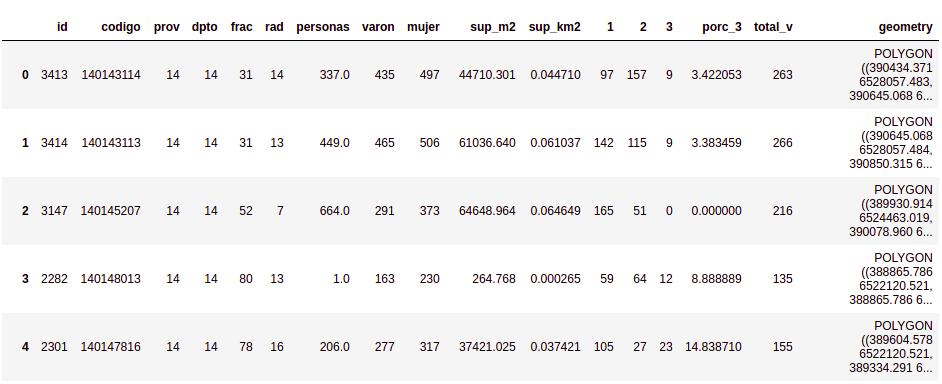


In [30]:
import pandas as pd

df_personas = pd.read_csv("./raw_data/personas.csv")

df_personas

,codigo,prov,dpto,frac,rad,varon,mujer,total
0,140070101,14,7,1,1,40,28,68
1,140070102,14,7,1,2,261,233,494
2,140070103,14,7,1,3,123,96,219
3,140070104,14,7,1,4,45,32,77
4,140070105,14,7,1,5,137,131,268
...,...,...,...,...,...,...,...,...
4747,141821308,14,182,13,8,229,225,454
4748,141821309,14,182,13,9,222,240,462
4749,141821310,14,182,13,10,242,249,491
4750,141821311,14,182,13,11,417,417,834


In [31]:
radios_merge

,id,codigo,personas,sup_m2,sup_km2,densidad,prov,dpto,frac,rad,1,2,3,total_v,porc_viv_3,geometry
0,3413,140143114,337.0,44710.301,0.044710,7537.412974,14,14,31,14,97,157,9,263,3.422053,"POLYGON ((390434.371 6528057.483, 390645.068 6..."
1,3414,140143113,449.0,61036.640,0.061037,7356.237171,14,14,31,13,142,115,9,266,3.383459,"POLYGON ((390645.068 6528057.484, 390850.315 6..."
2,3147,140145207,664.0,64648.964,0.064649,10270.852930,14,14,52,7,165,51,0,216,0.000000,"POLYGON ((389930.914 6524463.019, 390078.96 65..."
3,2282,140148013,1.0,264.768,0.000265,3776.898228,14,14,80,13,59,64,12,135,8.888889,"POLYGON ((388865.786 6522120.521, 388865.786 6..."
4,2301,140147816,206.0,37421.025,0.037421,5504.926763,14,14,78,16,105,27,23,155,14.838710,"POLYGON ((389604.578 6522120.521, 389334.291 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,3615,140140515,64.0,5056.056,0.005056,12658.088056,14,14,5,15,148,224,4,376,1.063830,"POLYGON ((392253.807 6528057.484, 392473.029 6..."
263,3632,140140708,1326.0,917454.615,0.917455,1445.303101,14,14,7,8,33,179,68,280,24.285714,"POLYGON ((399196.665 6527354.591, 399318.184 6..."
264,3780,140145307,596.0,63240.050,0.063240,9424.407412,14,14,53,7,169,45,1,215,0.465116,"POLYGON ((389742.62 6524144.17, 389844.97 6524..."
265,3781,140145205,456.0,60538.975,0.060539,7532.337593,14,14,52,5,116,40,1,157,0.636943,"POLYGON ((390355.877 6524679.751, 390428.173 6..."


In [33]:
print(df_personas.codigo)
print(radios_merge.codigo)

0       140070101
1       140070102
2       140070103
3       140070104
4       140070105
          ...    
4747    141821308
4748    141821309
4749    141821310
4750    141821311
4751    141821312
Name: codigo, Length: 4752, dtype: int64
0      140143114
1      140143113
2      140145207
3      140148013
4      140147816
         ...    
262    140140515
263    140140708
264    140145307
265    140145205
266    141470206
Name: codigo, Length: 267, dtype: object


In [34]:
df_personas = df_personas.astype({'codigo' : str})
df_personas.head()

,codigo,prov,dpto,frac,rad,varon,mujer,total
0,140070101,14,7,1,1,40,28,68
1,140070102,14,7,1,2,261,233,494
2,140070103,14,7,1,3,123,96,219
3,140070104,14,7,1,4,45,32,77
4,140070105,14,7,1,5,137,131,268


In [35]:
print("df_personas códigos únicos:", df_personas['codigo'].nunique())
print("radios_merge códigos únicos:", radios_merge['codigo'].nunique())

df_personas códigos únicos: 4752
radios_merge códigos únicos: 267


In [57]:
radios_merge_per = radios_merge.merge(df_personas, how = 'left', left_on = 'codigo', right_on = 'codigo')
radios_merge_per.head()

,id,codigo,personas,sup_m2,sup_km2,densidad,prov_x,dpto_x,frac_x,rad_x,...,total_v,porc_viv_3,geometry,prov_y,dpto_y,frac_y,rad_y,varon,mujer,total
0,3413,140143114,337.0,44710.301,0.044710,7537.412974,14,14,31,14,...,263,3.422053,"POLYGON ((390434.371 6528057.483, 390645.068 6...",14,14,31,14,435,497,932
1,3414,140143113,449.0,61036.640,0.061037,7356.237171,14,14,31,13,...,266,3.383459,"POLYGON ((390645.068 6528057.484, 390850.315 6...",14,14,31,13,465,506,971
2,3147,140145207,664.0,64648.964,0.064649,10270.852930,14,14,52,7,...,216,0.000000,"POLYGON ((389930.914 6524463.019, 390078.96 65...",14,14,52,7,291,373,664
3,2282,140148013,1.0,264.768,0.000265,3776.898228,14,14,80,13,...,135,8.888889,"POLYGON ((388865.786 6522120.521, 388865.786 6...",14,14,80,13,163,230,393
4,2301,140147816,206.0,37421.025,0.037421,5504.926763,14,14,78,16,...,155,14.838710,"POLYGON ((389604.578 6522120.521, 389334.291 6...",14,14,78,16,277,317,594


In [58]:
radios_merge_per.columns

Index(['id', 'codigo', 'personas', 'sup_m2', 'sup_km2', 'densidad', 'prov_x',
       'dpto_x', 'frac_x', 'rad_x', '1', '2', '3', 'total_v', 'porc_viv_3',
       'geometry', 'prov_y', 'dpto_y', 'frac_y', 'rad_y', 'varon', 'mujer',
       'total'],
      dtype='object')

In [59]:
radios_merge_per = radios_merge_per.drop(['prov_y', 'dpto_y', 'frac_y', 'rad_y'], axis=1)
radios_merge_per = radios_merge_per.reset_index(drop=True)
radios_merge_per.columns

Index(['id', 'codigo', 'personas', 'sup_m2', 'sup_km2', 'densidad', 'prov_x',
       'dpto_x', 'frac_x', 'rad_x', '1', '2', '3', 'total_v', 'porc_viv_3',
       'geometry', 'varon', 'mujer', 'total'],
      dtype='object')

In [61]:
nombres_col_merge  = {'prov_x': 'prov', 'dpto_x': 'dpto', 'frac_x': 'frac', 'rad_x': 'rad'}

#Renombramos usando el diccionario anterior:
radios_merge_per.rename(columns = nombres_col_merge, inplace = True)

radios_merge_per.head()

,id,codigo,personas,sup_m2,sup_km2,densidad,prov,dpto,frac,rad,1,2,3,total_v,porc_viv_3,geometry,varon,mujer,total
0,3413,140143114,337.0,44710.301,0.044710,7537.412974,14,14,31,14,97,157,9,263,3.422053,"POLYGON ((390434.371 6528057.483, 390645.068 6...",435,497,932
1,3414,140143113,449.0,61036.640,0.061037,7356.237171,14,14,31,13,142,115,9,266,3.383459,"POLYGON ((390645.068 6528057.484, 390850.315 6...",465,506,971
2,3147,140145207,664.0,64648.964,0.064649,10270.852930,14,14,52,7,165,51,0,216,0.000000,"POLYGON ((389930.914 6524463.019, 390078.96 65...",291,373,664
3,2282,140148013,1.0,264.768,0.000265,3776.898228,14,14,80,13,59,64,12,135,8.888889,"POLYGON ((388865.786 6522120.521, 388865.786 6...",163,230,393
4,2301,140147816,206.0,37421.025,0.037421,5504.926763,14,14,78,16,105,27,23,155,14.838710,"POLYGON ((389604.578 6522120.521, 389334.291 6...",277,317,594


In [62]:
radios_merge_per.to_file("./proc/out/radios_merge_viv_personas.shp", driver='ESRI Shapefile')

radios_merge_per.to_file("./proc/out/radios_merge_viv_personas.gpkg", layer='radios', driver='GPKG')

## 2. Extracción de vectores a partir archivos HDF5 (para quien le interese)

En esta última sección de la Notebook, veremos cómo extraer puntos de mediciones LiDAR de la misión [GEDI](https://gedi.umd.edu/)  que se encuentran en formato HDF5, y guardarlos como archivos GeoPackage. Nos basaremos en este [tutorial del Servicio Geológico de Estados Unidos](https://lpdaac.usgs.gov/resources/e-learning/getting-started-gedi-l2b-data-python/), desarrollado por Cole Krehbiel. 

La misión satelital GEDI (acrónimo de _Global Ecosystem Dynamics Investigation_) tiene como objetivo mapear en 3D la estrucutra de distintas superficies y regiones de la Tierra, por medio del uso de un intrumento LiDAR. El foco está puesto en la medición de la altura de los árboles, la caracterización de la estructura de los mismos y su diferenciación respecto a otro tipo de superficies. 

Los productos GEDI se distribuyen en [diversos niveles de procesamiento](https://gedi.umd.edu/data/products/), cuya base técnica y teórica puede ser consultada en [este documento](https://gedi.umd.edu/data/documents/) Nosotros aquí trabajaremos con un archivo que se encuentra en el nivel L2B, que tiene ya computadas algunas métricas como la altura de las copas de los árboles, la altura del suelo, el índice de área foliar (LAI), y la fracción cubierta por árboles , entre otros.

Al igual que como lo hicimos con la imagen MODIS en la Clase 02, iremos _navegando_ por la estructura del archivo, y extraeremos una serie de atributos. La lista detallada con los nombres de los atributos para el nivel L2B puede ser consultada [aquí](https://lpdaac.usgs.gov/products/gedi02_bv001/).

Lo primero que haremos es leer el archivo **processed_GEDI02_B_2021290204040_O16129_04_T10732_02_003_01_V002.h5** que pueden descargar del Drive desde este [enlace](https://drive.google.com/file/d/1xiyZAlr-Ls36JZUHOxCrTMcLRY3o333l/view?usp=sharing), y colocarlo en la carpeta **raw_data**.

Para leer archivos .h5, es necesario contar con la librería **h5py**. Normalmente viene instalada con Python, pero en caso negativo, podés correr la siguiente celda:

```python
## Correr solamente si no tienen instalado h5py
!pip3 install h5py
```

In [36]:
#

```python
#Definimos el nombre del archivo a leer
import h5py

L2B = 'processed_GEDI02_B_2021290204040_O16129_04_T10732_02_003_01_V002.h5'
gediL2B = h5py.File('../data/raw_data/' + L2B, 'r')  # Leemos el archivo
```

In [38]:
import h5py

L2B = 'processed_GEDI02_B_2021234185041_O15260_04_T00618_02_003_01_V002.h5'
gediL2B = h5py.File('./raw_data/' + L2B, 'r')

A continuación, leeremos la lista de _Beams_ contenidos dentro de este archivo. Cada _beam_ corresponde a un haz de la adquisición Lidar. Los podemos consultar con el método **keys()**

```python
print(list(gediL2B.keys()))
```

In [39]:
print(list(gediL2B.keys()))

['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011', 'METADATA']


En 'METADATA' podremos encontrar información relevante respecto a nuestro archivo, agrupada bajo un nodo denominado _DatasetIdentification_:

```python
print(list(gediL2B['METADATA']))
for g in gediL2B['METADATA']['DatasetIdentification'].attrs: 
    print(g)

#Podemos imprimir el contenido de algunas de las entradas de _DatasetIdentification_ con el método attrs():
print(gediL2B['METADATA']['DatasetIdentification'].attrs['shortName'])
```

In [40]:
print(list(gediL2B['METADATA']))
for g in gediL2B['METADATA']['DatasetIdentification'].attrs: 
    print(g)

#Podemos imprimir el contenido de algunas de las entradas de _DatasetIdentification_ con el método attrs():
print(gediL2B['METADATA']['DatasetIdentification'].attrs['shortName'])

['DatasetIdentification']
PGEVersion
VersionID
abstract
characterSet
creationDate
credit
fileName
language
originatorOrganizationName
purpose
shortName
spatialRepresentationType
status
topicCategory
uuid
GEDI_L2B


Nos quedamos solo con los BEAMS. METADATA no nos importa por ahora:

```python
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]
print(beamNames)
```

In [41]:
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]
print(beamNames)

['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']


A continuación, generamos una lista de todos los _datasets_ espaciales que hay dentro de nuestro archivo. Para "navegar" dentro de la estructura, aplicamos el método **visit()** dentro de nuestra variable gediL2B:

```python
gediL2B_objs = []

#Obtener la lista de datasets:
gediL2B.visit(gediL2B_objs.append)

#Filtrar solo aquellos datasets espaciales:
gediSDS = [o for o in gediL2B_objs if isinstance(gediL2B[o], h5py.Dataset)]
```

In [42]:
gediL2B_objs = []

#Obtener la lista de datasets:
gediL2B.visit(gediL2B_objs.append)

#Filtrar solo aquellos datasets espaciales:
gediSDS = [o for o in gediL2B_objs if isinstance(gediL2B[o], h5py.Dataset)]

Vamos a trabajar con un subconjunto de atributos (12 en total). Esto puede variar según el interés o necesidad de cada uno, y como se indicó más arriba el diccionario completo de atributos se puede consultar [aquí](https://lpdaac.usgs.gov/products/gedi02_bv001/):

```python
#Generamos las listas vacias
shotNum, dem, zElevation, zHigh, zLat, zLon, canopyHeight, quality, degrade, sensitivity, pai, beamI = ([] for i in range(12))
```

In [43]:
shotNum, dem, zElevation, zHigh, zLat, zLon, canopyHeight, quality, degrade, sensitivity, pai, beamI = ([] for i in range(12))

Ahora cargamos cada uno de los datasets a las listas que hemos generado previamente:

```python
for b in beamNames:
    [shotNum.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
    [dem.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
    [zElevation.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]  
    [zHigh.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]  
    [zLat.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]  
    [zLon.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]  
    [canopyHeight.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/rh100') and b in g][0]][()]]  
    [quality.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/l2b_quality_flag') and b in g][0]][()]]  
    [degrade.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]  
    [sensitivity.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]  
    [beamI.append(h) for h in [b] * len(gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]  
    [pai.append(h) for h in gediL2B[f'{b}/pai'][()]]
```

In [44]:
for b in beamNames:
    [shotNum.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
    [dem.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
    [zElevation.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]  
    [zHigh.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]  
    [zLat.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]  
    [zLon.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]  
    [canopyHeight.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/rh100') and b in g][0]][()]]  
    [quality.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/l2b_quality_flag') and b in g][0]][()]]  
    [degrade.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]  
    [sensitivity.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]  
    [beamI.append(h) for h in [b] * len(gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]  
    [pai.append(h) for h in gediL2B[f'{b}/pai'][()]]

Ahora que tenemos todos los datos de nuestro interés cargados en las listas, podemos combinarlas en un DataFrame de Pandas para manejarlas de manera integrada. A la columna **Canopy Height (rh100)** la dividimos por 100 para que quede expresada en metros: 

```python
allDF = pd.DataFrame({'Shot Number': shotNum, 'Beam': beamI, 'Latitude': zLat, 'Longitude': zLon, 'Tandem-X DEM': dem,
                      'Elevation (m)': zElevation, 'Canopy Elevation (m)': zHigh, 'Canopy Height (rh100)': canopyHeight,
                      'Quality Flag': quality, 'Plant Area Index': pai,'Degrade Flag': degrade, 'Sensitivity': sensitivity})

allDF['Canopy Height (rh100)'] /= 100
allDF.head()
```

In [45]:
allDF = pd.DataFrame({'Shot Number': shotNum, 'Beam': beamI, 'Latitude': zLat, 'Longitude': zLon, 'Tandem-X DEM': dem,
                      'Elevation (m)': zElevation, 'Canopy Elevation (m)': zHigh, 'Canopy Height (rh100)': canopyHeight,
                      'Quality Flag': quality, 'Plant Area Index': pai,'Degrade Flag': degrade, 'Sensitivity': sensitivity})

allDF['Canopy Height (rh100)'] /= 100
allDF.head()

,Shot Number,Beam,Latitude,Longitude,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Plant Area Index,Degrade Flag,Sensitivity
0,152600000400314774,BEAM0000,-27.946662,-56.047801,133.520996,135.536697,139.132202,3.58,0,0.068096,0,0.893462
1,152600000400314775,BEAM0000,-27.947043,-56.047414,133.520996,133.387085,136.495697,3.09,0,0.082662,0,0.864340
2,152600000400314776,BEAM0000,-27.947423,-56.047026,131.866013,131.911316,134.907578,2.99,0,0.049323,0,0.857669
3,152600000400314777,BEAM0000,-27.947804,-56.046639,131.866013,130.313675,143.946625,13.63,1,3.029483,0,0.934099
4,152600000400314778,BEAM0000,-27.948185,-56.046250,135.754715,130.992615,143.464523,12.47,1,2.299867,0,0.924548


Si miramos nuestro DataFrame, tenemos los datos de Latitud y Longitud, para cada uno de las filas. En verdad, cada uno de los _Shot Number_ que identifican a las entradas representan un punto sobre la superficie. Lo que podemos hacer entonces es generar una columna de geometría usando los valores de Latitud y Longitud, usando la función **Point()** de Shapely:

```python
from shapely.geometry import Point

#Con .apply() hacemos el cálculo de la geometría como un punto formado por Lat y Lon, para
# cada una de las filas:

allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
```

In [46]:
from shapely.geometry import Point

#Con .apply() hacemos el cálculo de la geometría como un punto formado por Lat y Lon, para
# cada una de las filas:

allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

Con el campo de geometría generado, podemos convertir nuestro DataFrame a GeoDataFrame, y guardarlo en alguno de los formatos que ya hemos trabajado.

```python
allDF = gpd.GeoDataFrame(allDF)
allDF.plot()
```

<Axes: >

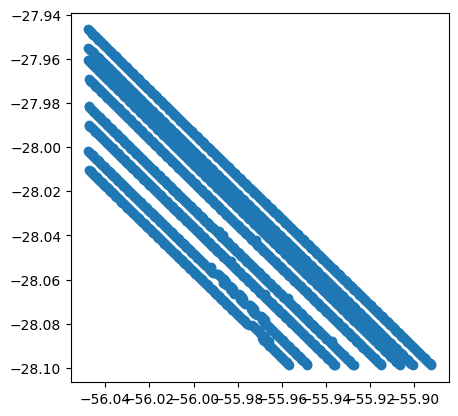

In [47]:
allDF = gpd.GeoDataFrame(allDF)
allDF.plot()

Generamos la salida como geopackage:

```python
allDF.set_crs(4326, inplace = True, allow_override = True)
gdf_name = L2B.split('.')[0] + '.gpkg'
allDF.to_file('../data/out/' + gdf_name)
```

In [49]:
allDF.set_crs(4326, inplace = True, allow_override = True)
gdf_name = L2B.split('.')[0] + '.gpkg'
allDF.to_file('./out/' + gdf_name)

Al abrirlo en QGIS, podemos corroborar la exportación y visualizar sus atributos:

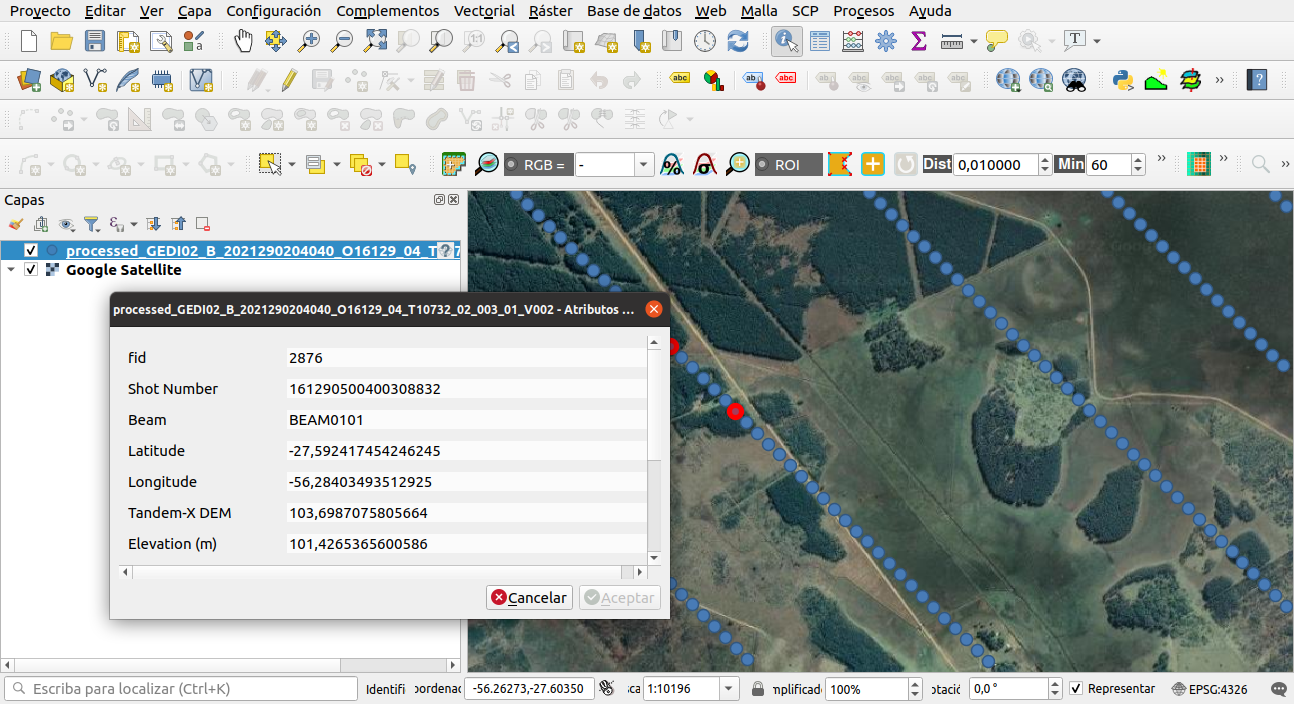